![MicrosoftFilm](images/MicrosoftFilm.jpg)
# Movies for Microsoft: A Film Market Analysis

**Authors:** Jacob Heyman, Mitch Krieger
***
*Project overview, Dataset information and cleaning can be found here* (XXXX INSERT HYPERLINK XXXX)
***
## Analysis
This notebook focuses how on various facors (year, runtime_minutes, genre, production_budget, principle_crew (nmconst), averagerating) affect those our grosses metrics in our analysis for movies.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper_functions import *

### Grosses Distributions
First we created distributions of the various measures of gross revenues to see if there were any major differences in the shape of the distributions:

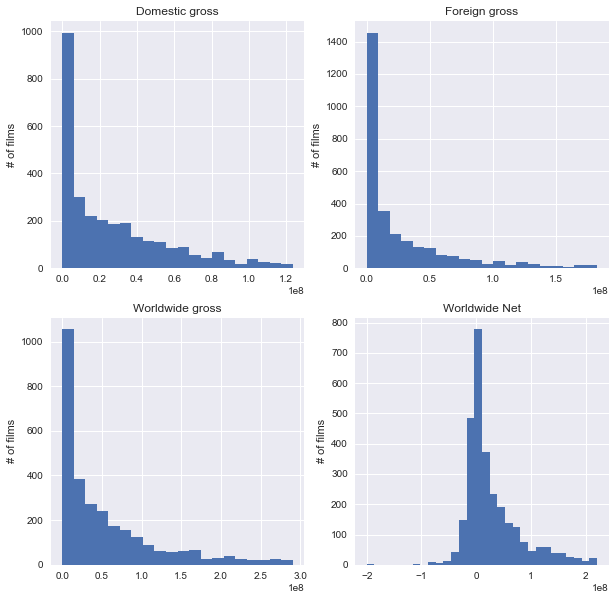

In [12]:
#Outlier Tolerances
outlier_tolerance_wgross = noZero_gross.worldwide_gross.quantile(.9)
outlier_tolerance_wnet = noZero_gross.worldwide_net.quantile(.9)
outlier_tolerance_fgross = noZero_gross.foreign_gross.quantile(.9)
outlier_tolerance_dgross = noZero_gross.domestic_gross.quantile(.9)

#create historgrams eliminating outliers using the tolerances above
fig_gross_distb, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax[0][0].hist(noZero_gross.loc[noZero_gross.domestic_gross<outlier_tolerance_dgross].domestic_gross,bins=20)
label_chart(ax[0][0],title='Domestic gross',ylabel='# of films')

ax[0][1].hist(noZero_gross.loc[noZero_gross.foreign_gross<outlier_tolerance_fgross].foreign_gross,bins=20)
label_chart(ax[0][1],title='Foreign gross',ylabel='# of films')

ax[1][0].hist(noZero_gross.loc[noZero_gross.worldwide_gross<outlier_tolerance_wgross].worldwide_gross,bins=20)
label_chart(ax[1][0],title='Worldwide gross',ylabel='# of films')

ax[1][1].hist(noZero_gross.loc[noZero_gross.worldwide_net<outlier_tolerance_wnet].worldwide_net,bins=30)
label_chart(ax[1][1],title='Worldwide Net',ylabel='# of films')

Foreign, domestic and world wide grosses are all similarly right skewed. Their similar shape indicates that future analysis using different box office grosses may yeild similar results. Percentage gross on the other hand, while still right skewed has a left tail representing movies that lost money/had a negative ROI.
***
### Genre Investigation
Next, we broke down grosses further by analyzing how the genre of a film may cause it to perform differently at the box office. We created the following matrix of genres plot their average `worldwide_net` over the past 10 years to demonstrates trends in genres:

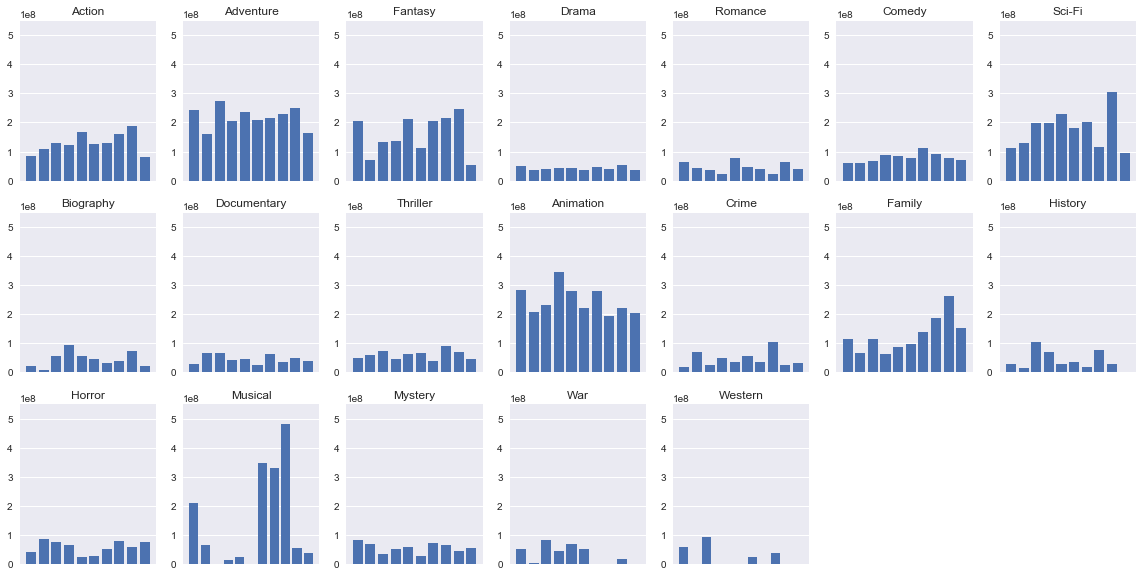

In [6]:
#list of major genres
genre_list = ['Action','Adventure','Fantasy','Drama','Romance','Comedy',
              'Sci-Fi','Biography','Documentary','Thriller','Animation',
              'Crime','Family','History','Horror','Musical','Mystery',
              'War','Western']

#create figure with subplots
figure_gross_genre, ax = plt.subplots(figsize = (20,10),ncols=7, nrows=3)

#iterate over genres_list to generate plot for each axis
for i,genre in enumerate(genre_list):
    col = i%7
    row = i//7
    genre_vs_net(genre,ax[row][col])

#turn off axes not used  
ax[2][5].axis('off');
ax[2][6].axis('off');

Between these diagrams we can itentify that Action, Adventure, Fantasy, Sci-Fi, Animation, and musical films often have a high gross. However, these movies also often have a large budget, potentially lowering their return on investment.

Doing the same analysis for `percent_gross` yeilds:

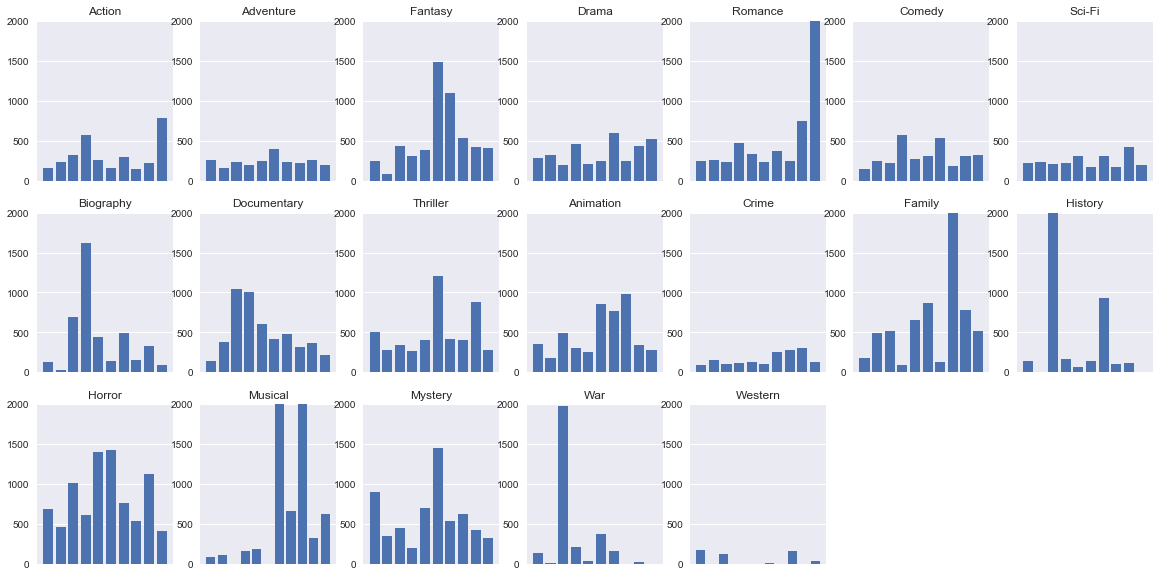

In [7]:
#create figure with subplots
figure_percent_genre, ax = plt.subplots(figsize = (20,10),ncols=7, nrows=3)

#iterate over genres_list to generate plot for each axis
for i,genre in enumerate(genre_list):
    col = i%7
    row = i//7
    genre_vs_percent_gross(genre,ax[row][col])

#turn off axes not used    
ax[2][5].axis('off');
ax[2][6].axis('off');

When considering percent gross horror, thriller, documentary and mystery emerge as potentially lucarative. Animation, fantasy and family movies also see high returns.

***

### Budget investigation
Breaking up budgets into budget categories to see whether high, low or budgets somwhere in-between would create better return on investments. We defined budget categories by splitting the data into fifths:
- **Extremely High Budget:** Above \\$85 million
- **High Budget:** \\$ 20 million - \\$ 85 million
- **Medium Budget:** \\$ 5 million - \\$ 20 millioon
- **Low Budget:** \\$ 500 thousand - \\$ 5 million
- **Extremely Low Budget:** Under \\$ 500 thousand


In [9]:
#create budget category datasets by slicing noZero_gross dataframe
ex_high_budget_df = noZero_gross.loc[noZero_gross.production_budget >= 85000000]
high_budget_df = noZero_gross.loc[(noZero_gross.production_budget < 85000000)  & 
                                  (noZero_gross.production_budget >= 20000000)]
med_budget_df = noZero_gross.loc[(noZero_gross.production_budget < 20000000)  & 
                                 (noZero_gross.production_budget >= 5000000)]
low_budget_df = noZero_gross.loc[(noZero_gross.production_budget < 5000000) & 
                                 (noZero_gross.production_budget >= 500000)]
ex_low_budget_df = noZero_gross.loc[noZero_gross.production_budget < 500000]

#list of buget dataframes
budget_cat = [ex_high_budget_df, high_budget_df, med_budget_df, low_budget_df, ex_low_budget_df]

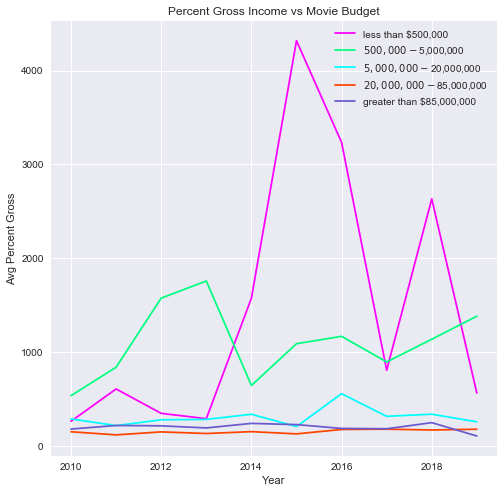

In [10]:
#creat figure
figure_budget, ax = plt.subplots(figsize = (8,8))

#groupby year to identify trend over time and get mean percentage gross in each year
y_values = [budget.groupby(['start_year'])['percent_gross'].mean()[:10] for budget in budget_cat]
x = y_values[0].index

#plot on same axis with different colors
ax.plot(x,y_values[4], label = 'less than $500,000', color='magenta')
ax.plot(x,y_values[3], label = '$500,000 - $5,000,000', color = 'springgreen')
ax.plot(x,y_values[2], label = '$5,000,000 - $20,000,000', color = 'cyan')
ax.plot(x,y_values[1], label = '$20,000,000 - $85,000,000', color = 'orangered')
ax.plot(x,y_values[0], label = 'greater than $85,000,000', color = 'slateblue')
ax.set_title('Percent Gross Income vs Movie Budget')
ax.set_xlabel('Year')
ax.set_ylabel('Avg Percent Gross')


plt.legend();

From the above graph we can infer that lower buget films have a much higher chance of a high ROI but high budget films are more consitent. Further demonstrating this is the following kernel density estimate plot showing that low budget films can have high ROI but are also at high risk of negative returns, while high budget films do not spike as high for ROI but are more consistenly positive return.

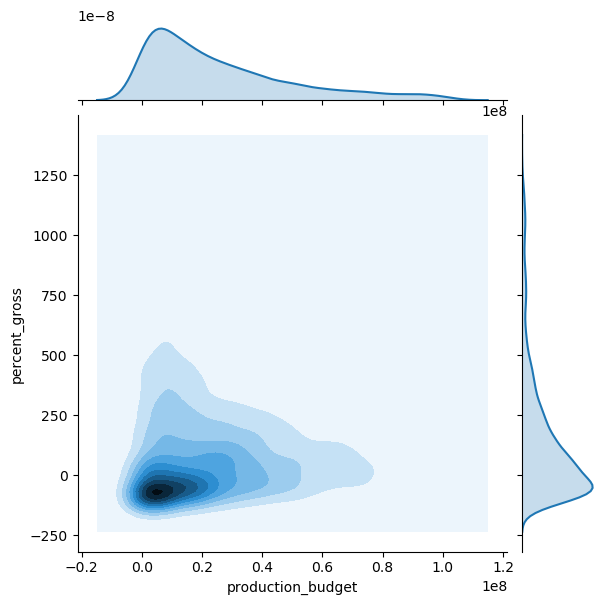

In [31]:
#Eliminate major outliers via quantile
outlier_tolerance_pgross = noZero_gross.percent_gross.quantile(.95)

#Choose Style
plt.style.use('default')

#Create Joint KDE
sns.jointplot(noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&
                (noZero_gross.production_budget <=1e8)].production_budget,
              noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&(noZero_gross.production_budget <=1e8)].percent_gross,
              kind="kde");

### Percentage Gross Investigation
From the KDE and line plots in the previous investigation, we can clearly see that production budget has an impact of percentage gross. What other factors can impact percentage gross? We looked at runtime, IMDB Rating, and principle cast & crew for the movie.

#### Percent Gross vs Runtime, Budget and IMDB Rating


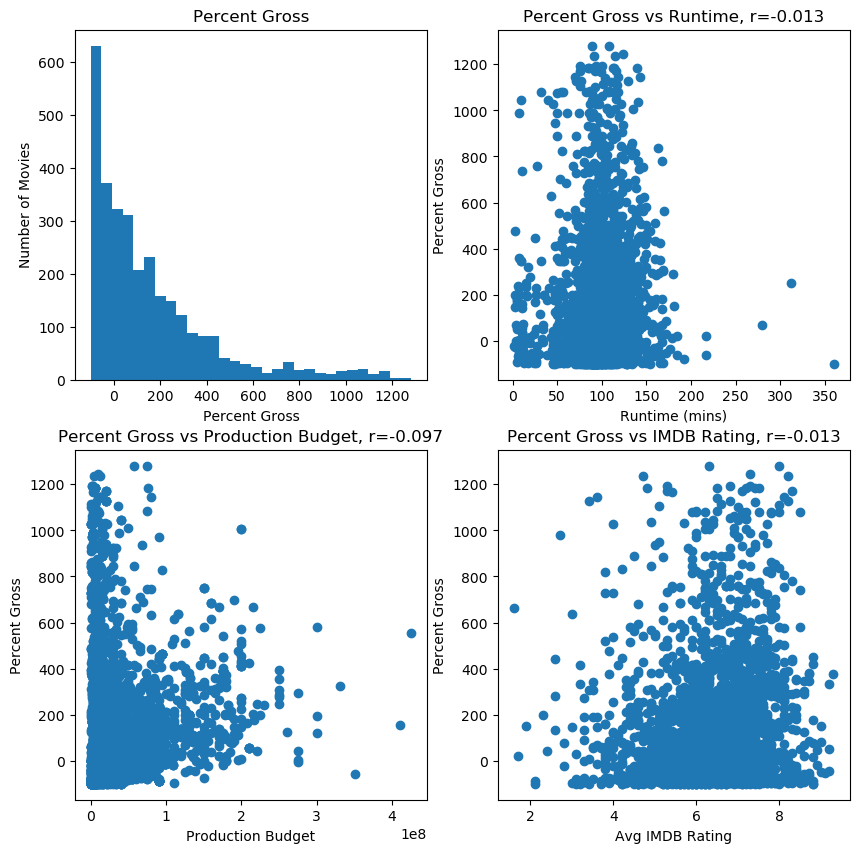

In [61]:
percentage_gross_scatter, ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))


#Eliminate outliers via quantile
outlier_tolerance_pgross = noZero_gross.percent_gross.quantile(.95)

#calculate correlations
budget_corr = noZero_gross.percent_gross.corr(noZero_gross.production_budget);
runtime_corr = noZero_gross.percent_gross.corr(noZero_gross.averagerating);
rating_corr = noZero_gross.percent_gross.corr(noZero_gross.averagerating);

#histogram
ax[0][0].hist(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross, bins=30);
label_chart(ax[0][0],title='Percent Gross',xlabel='Percent Gross',ylabel='Number of Movies')

#scatter vs runtime
ax[0][1].scatter(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].runtime_minutes,
                noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross);
label_chart(ax[0][1],title=f'Percent Gross vs Runtime, r={round(runtime_corr,3)}',
            xlabel='Runtime (mins)',ylabel='Percent Gross')

#scatter vs production budget
ax[1][0].scatter(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].production_budget,
                noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross);
label_chart(ax[1][0],title=f'Percent Gross vs Production Budget, r={round(budget_corr,3)}',xlabel='Production Budget',ylabel='Percent Gross')

#scatter vs avg IMDB rating
ax[1][1].scatter(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].averagerating,
                noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross);
label_chart(ax[1][1],title=f'Percent Gross vs IMDB Rating, r={round(rating_corr,3)}',xlabel='Avg IMDB Rating',ylabel='Percent Gross')

From the scatter plots above, it seems there is little mathematical correlation between percentage gross and these factors as production budget, average IMDB rating and runtime all have less correlation values of $r<\lvert0.1\rvert$. However, upon further investigation the kernel density plots reveal a little more information:

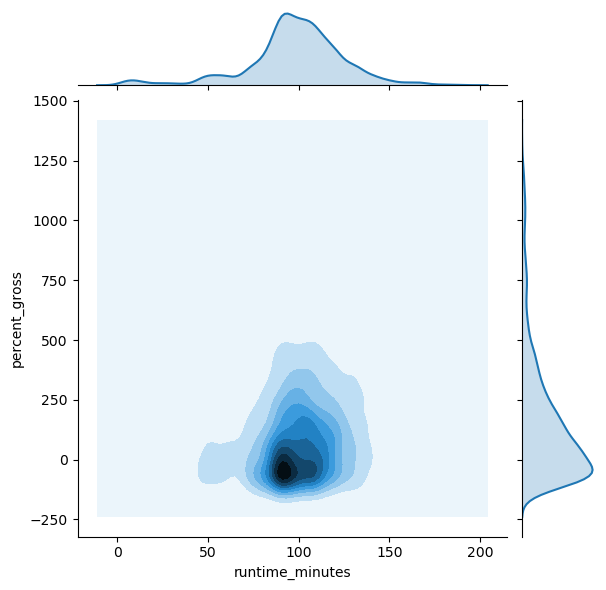

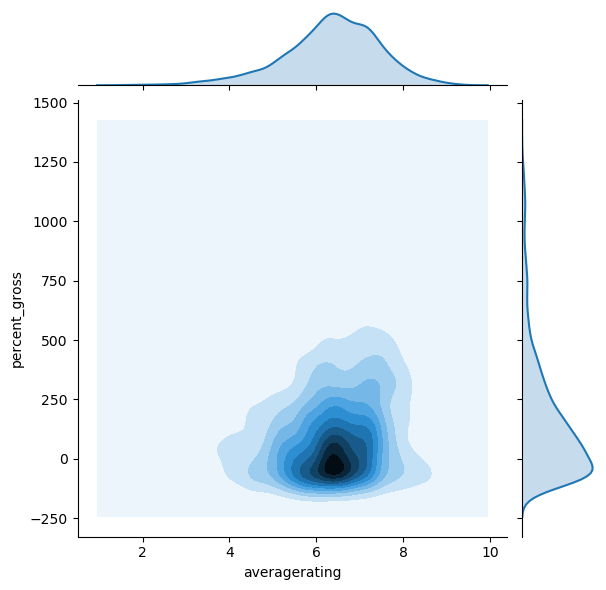

In [65]:
#Estimate Densities to find the typical movie
sns.jointplot(noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&(noZero_gross.runtime_minutes <=200)].runtime_minutes,
              noZero_gross.loc[(noZero_gross.percent_gross <= outlier_tolerance_pgross)&(noZero_gross.runtime_minutes <=200)].percent_gross, 
              kind="kde");

sns.jointplot(noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].averagerating,
                noZero_gross.loc[noZero_gross.percent_gross <= outlier_tolerance_pgross].percent_gross, kind="kde");

These plots reveal high density in certain areas. These areas tend to align with values that will allow for greater percentage gross due to its egg shape. (XXX HELP WITH THIS WORDING XXXX).

#### Percentage Gross vs Principle Cast & Crew
Similarly to the findings above Cast & Crew were not significantly correlated with percentage gross.

**Isolating Directors**

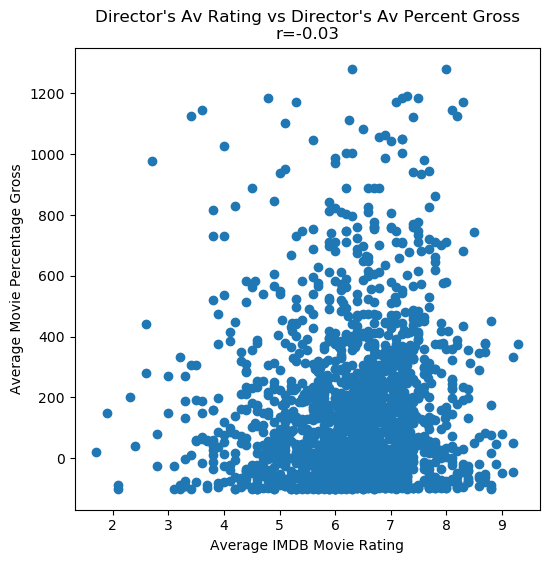

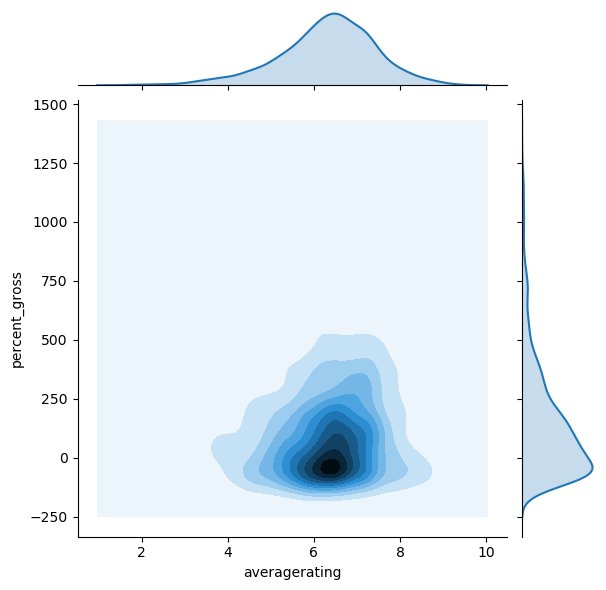

In [64]:
figure6, ax6 = plt.subplots(figsize=(6,6))

director_corr = crew_grosses_df.groupby('directors').percent_gross.mean().corr(crew_grosses_df.groupby('directors').averagerating.mean())

#Use crew_grosses_df grouped by directors' nconst, then take the mean of each director
ax6.scatter(crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('directors').averagerating.mean(),
            crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('directors').percent_gross.mean());
label_chart(ax6,title=f"Director's Av Rating vs Director's Av Percent Gross\nr={round(director_corr,2)}", 
            xlabel='Average IMDB Movie Rating', ylabel='Average Movie Percentage Gross')

sns.jointplot(crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('directors').averagerating.mean(),
            crew_grosses_df.loc[crew_grosses_df.percent_gross<outlier_tolerance_pgross].groupby('directors').percent_gross.mean(),kind='kde');


***
### Domestic vs Foreign Gross Investigation
To see if the success of movies varies due to regional differences we also compared domestic gross to forgein gross

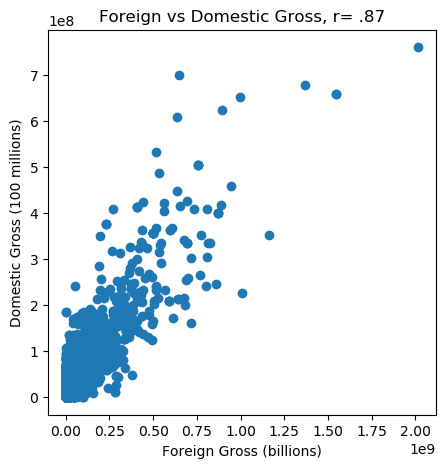

In [53]:
figure4, ax4 = plt.subplots(figsize=(5,5))
plt.scatter(noZero_gross.foreign_gross,noZero_gross.domestic_gross);
label_chart(ax4,xlabel='Foreign Gross (billions)',ylabel='Domestic Gross (100 millions)',title='Foreign vs Domestic Gross, r= .87')

#calculate correlation
noZero_gross.foreign_gross.corr(noZero_gross.domestic_gross);#High Correlation between domestic and foreign grosses

Foreign and domestic gross are highly correlated at $r=0.87$, indicating that a succussful domestic movie also does well abroad. This potentially means that tastes in foreign markets are similar enough to domestic markets and movies can be made without major concern about failure internationally.

***
## Conclusions

Our analysis leads us to suggest the following strategies to Microsoft:

- **Focus on a select few genres:** By focusing their efforts on a few genres with high potential grosses and/or ROI, Microsoft can build a competitive portfolio of films. The results of our analysis demonstrate that the following genres may yeild high successs: 

    - High Gross: Action, Adventure, Animation, Fantasy, Sci-Fi, Musical
    - High ROI: Horror, Mystery, Thriller, Documentary, Animation

- **Diversify Production Budgets:** Because high budget films more consistenly have net positive returns but are expensive and lower budger films have a higher return but a higher rate of failue, we suggest have a mixed portfolio of high and low budget films. Although there are outliers with high ROIs in extremely low budget films (less than \\$500,000), based off our findings we reccomend the setting lower budget portion of the portfolio between \\$500,000 to \\$5 million, and the higher buget portion at \\$5 to \\$20 million.
  
- **Movie Budget Spending:** There is little to no correlation between the factors average rating, princple crew/cast, and runtime, but there is a strong correlation between budget and success of a film. With this in mind, we can infer that the use of the budget can be used on other facets of movie production and studio operation without concern of major impact on success. Similarly, because there is a strong correlation between success domestically and in the foreign market, Microsoft can produce domestically successful movies without concern about their success abroad. 

## Next Steps

Many of the factors from our analysis drew a null conclusion. In a further investigation we would suggest looking at new factors such as, MPAA rating, awards, release time, etc to gauge other potential predictors of movie success. In addition, it would be beneficial to look at other factors of success that add to total profit such as streaming revenues, DVD sales, merchandising, advertising and so on, especially considering whether the distribution of Microsoft's movies will be in theaters or online via streaming. 